# Boston Dataset 

In [4]:
# Importing necesarry librarries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston = pd.read_csv('Boston.csv')

In [5]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
boston= boston.drop('Unnamed: 0', axis = 1)

## EDA

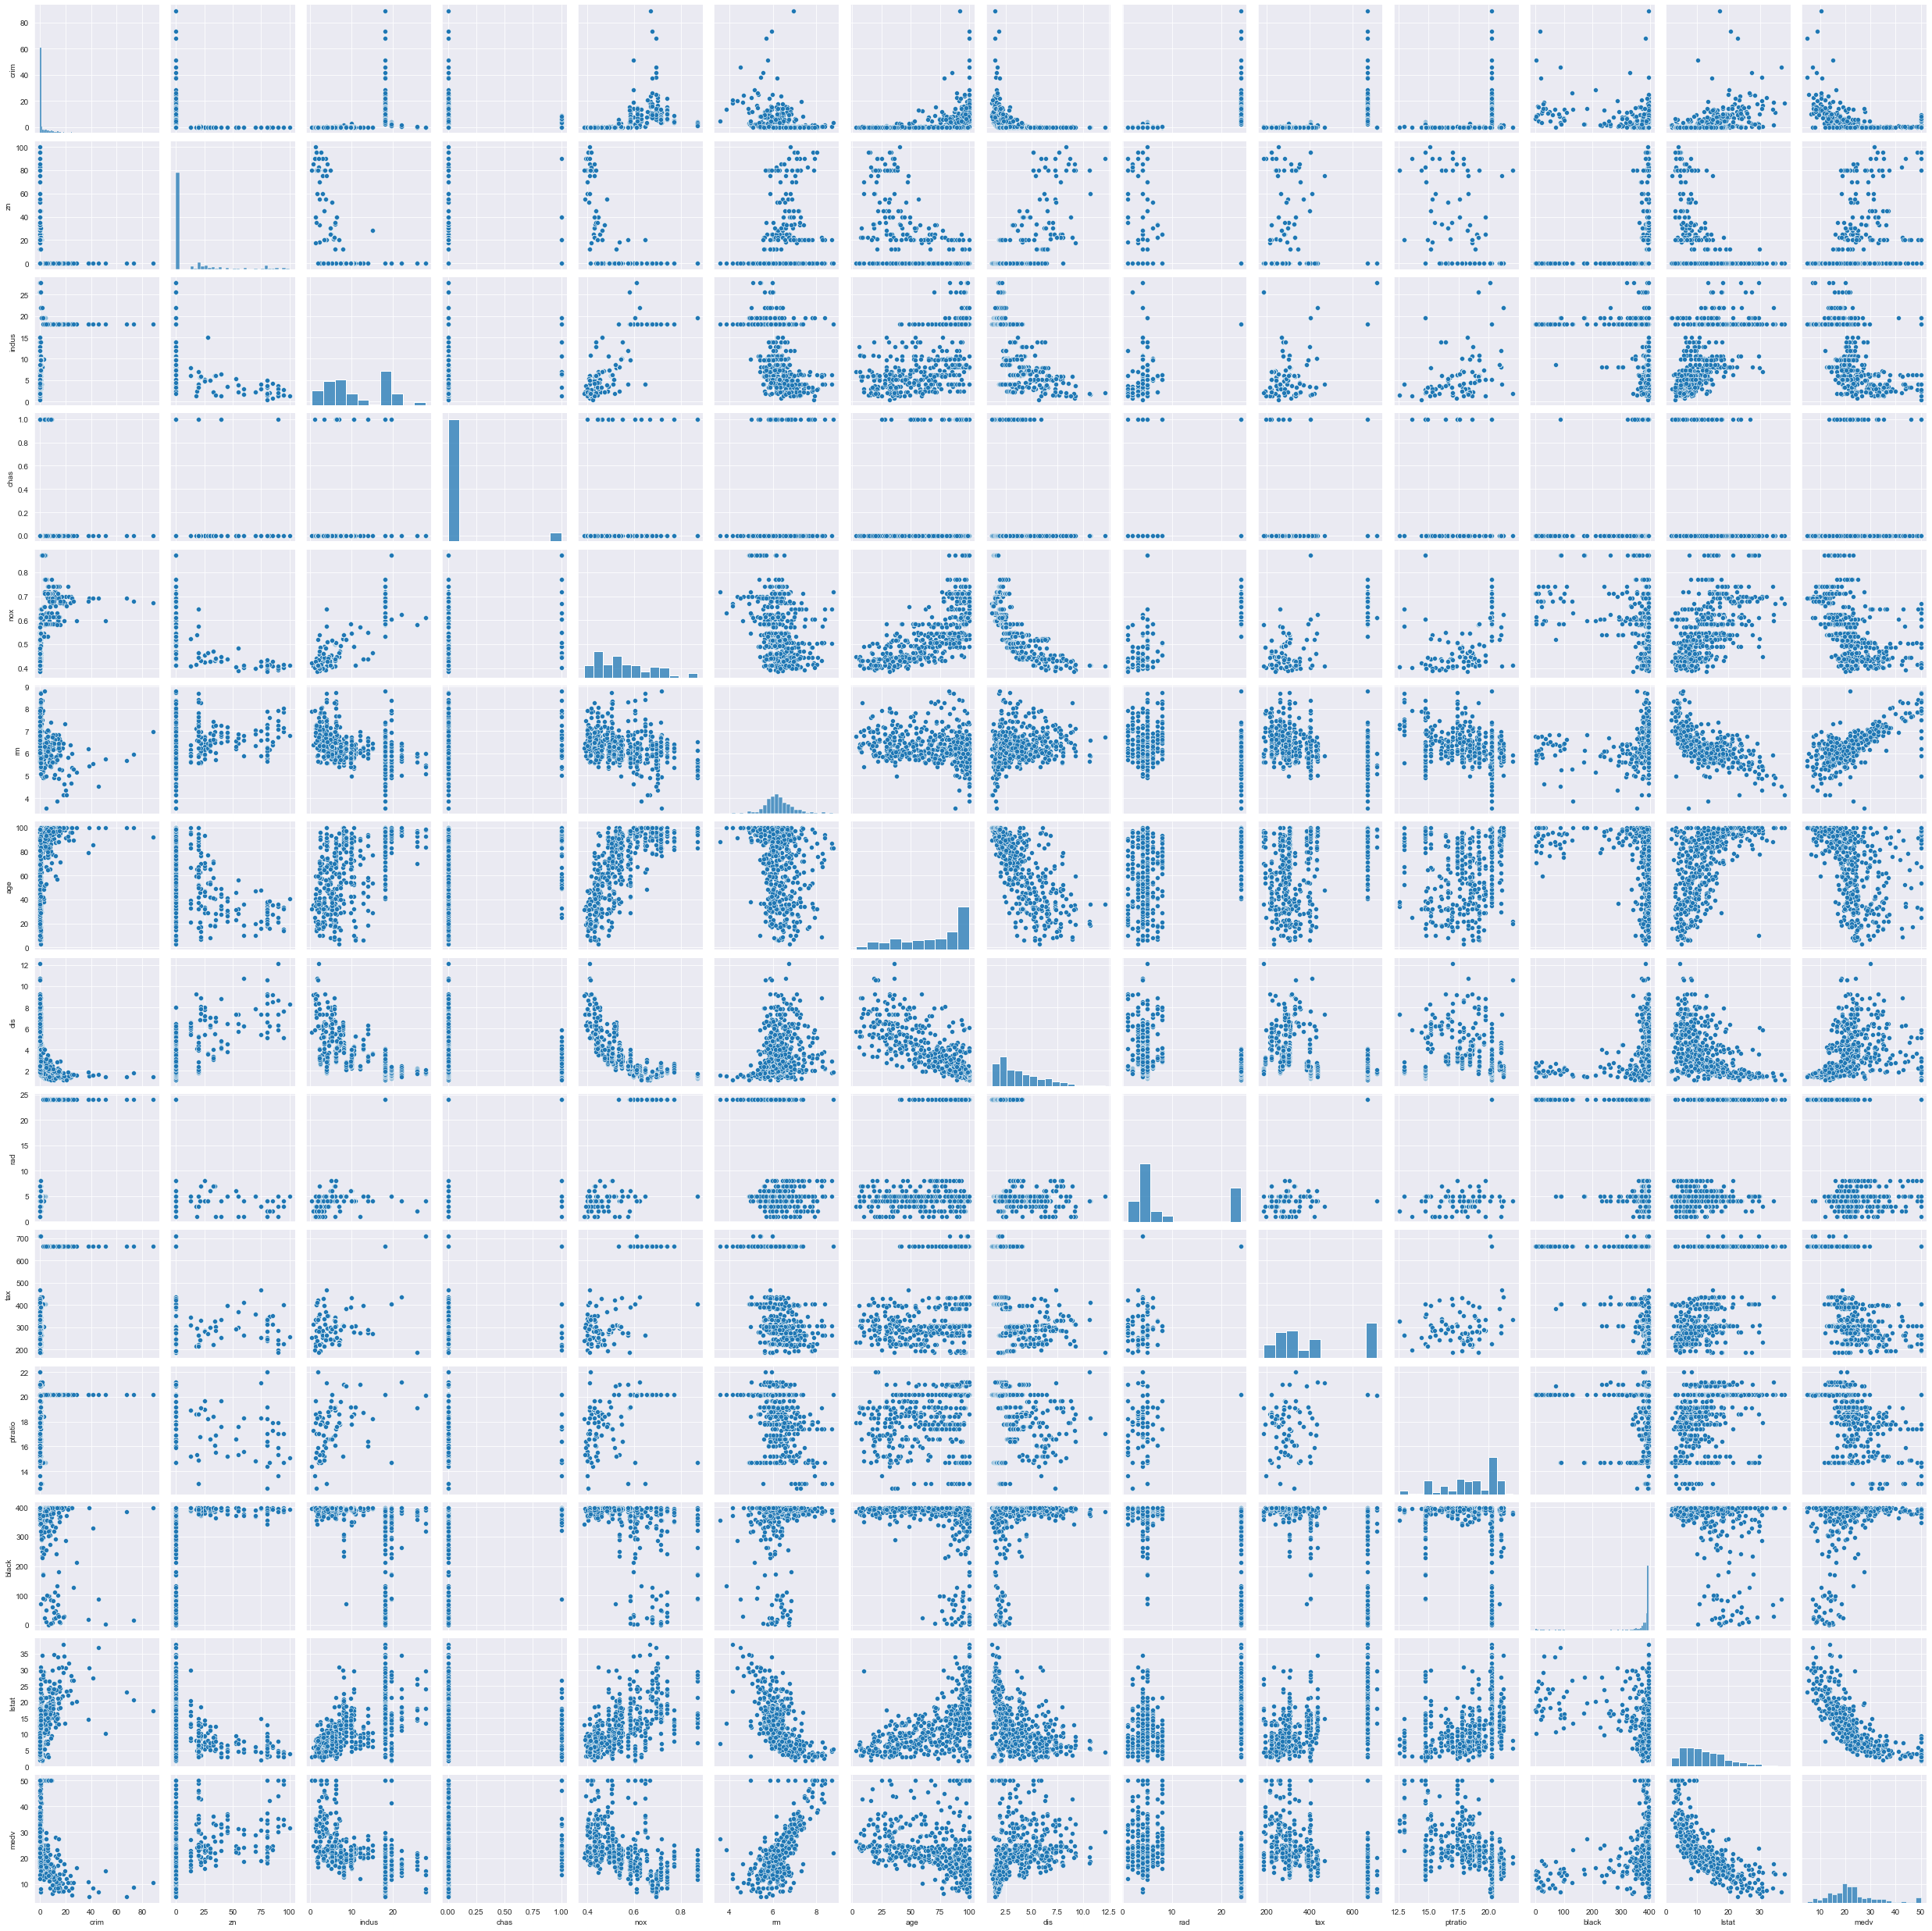

In [12]:
sns.set_style('darkgrid')
sns.pairplot(boston)

<AxesSubplot:xlabel='medv', ylabel='Count'>

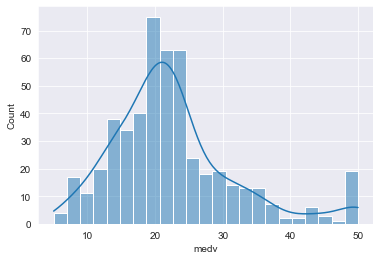

In [14]:
# Histogram for MEDV
sns.histplot(boston['medv'], kde=True)

In [15]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

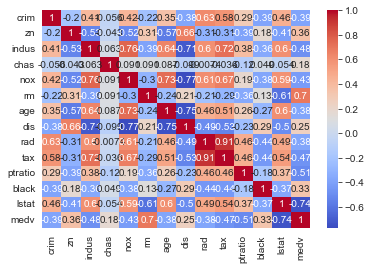

In [20]:
sns.heatmap(boston.corr(), annot = True, cmap ='coolwarm')

## Linear Regression

### Model Building

In [21]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [23]:
X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]

y = boston['medv']

In [24]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
lm.intercept_

40.21892901255103

In [36]:
lm.coef_

array([-8.85049752e-02,  5.02928536e-02,  2.03483110e-02,  3.75427054e+00,
       -1.77483714e+01,  3.24776492e+00,  1.20008182e-02, -1.40916141e+00,
        2.63880691e-01, -1.03440009e-02, -9.51780874e-01,  6.11600491e-03,
       -5.97133217e-01])

In [37]:
coef_df = pd.DataFrame(data = lm.coef_, index = X_train.columns, columns = ['Coefficients'])

In [38]:
coef_df

,Coefficients
crim,-0.088505
zn,0.050293
indus,0.020348
chas,3.754271
nox,-17.748371
rm,3.247765
age,0.012001
dis,-1.409161
rad,0.263881
tax,-0.010344


### Predictions

In [40]:
predictions = lm.predict(X_test)
predictions

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

### Assessment

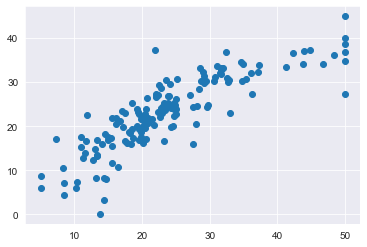

In [41]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='medv', ylabel='Count'>

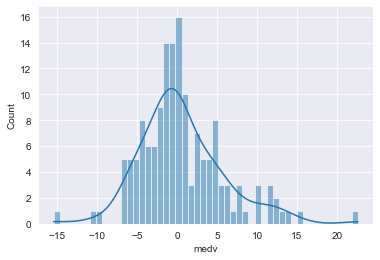

In [43]:
sns.histplot((y_test - predictions), kde = True, bins = 50)

In [44]:
from sklearn import metrics

In [45]:
metrics.mean_absolute_error(y_test, predictions)

3.835696361418932

In [47]:
metrics.mean_squared_error(y_test, predictions)

28.547585271468137

In [46]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.34299403625609